<a href="https://colab.research.google.com/github/tomek-l/fire/blob/master/Binary_classifier_from_scratch_for_fire_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import tensorflow.keras as keras
keras.__version__

'2.2.4-tf'

In [1]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
IMAGE_DIR = '/content/gdrive/My Drive/FireVideo/dry_creek/'
image_paths = [IMAGE_DIR+fname for fname in os.listdir(IMAGE_DIR)]



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


#Create and compile model

In [2]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

W0620 15:37:52.299566 140479816091520 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0620 15:37:52.491667 140479816091520 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255 (to 0-1 range)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        '/content/gdrive/My Drive/FireVideo/binary_dataset/train',
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=16,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/gdrive/My Drive/FireVideo/binary_dataset/validation',
        target_size=(150, 150),
        batch_size=16,
        class_mode='binary')

Found 1826 images belonging to 2 classes.
Found 191 images belonging to 2 classes.


In [5]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/15
100/100 [==============================] - 550s 6s/step - loss: 0.5026 - acc: 0.7377 - val_loss: 0.3468 - val_acc: 0.8756
Epoch 2/15
100/100 [==============================] - 71s 706ms/step - loss: 0.3742 - acc: 0.8381 - val_loss: 0.2986 - val_acc: 0.8530
Epoch 3/15
100/100 [==============================] - 52s 523ms/step - loss: 0.3421 - acc: 0.8493 - val_loss: 0.2752 - val_acc: 0.8807
Epoch 4/15
100/100 [==============================] - 52s 525ms/step - loss: 0.3149 - acc: 0.8651 - val_loss: 0.2623 - val_acc: 0.8907
Epoch 5/15
100/100 [==============================] - 51s 515ms/step - loss: 0.2637 - acc: 0.8887 - val_loss: 0.2585 - val_acc: 0.9070
Epoch 6/15
100/100 [==============================] - 52s 519ms/step - loss: 0.2570 - acc: 0.8997 - val_loss: 0.2689 - val_acc: 0.9058
Epoch 7/15
100/100 [==============================] - 52s 517ms/step - loss: 0.2550 - acc: 0.8953 - val_loss: 0.3921 - val_acc: 0.8279
Epoch 8/15
100/100 [==============================] - 51s

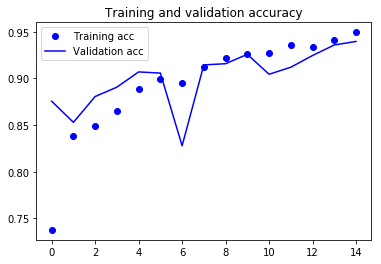

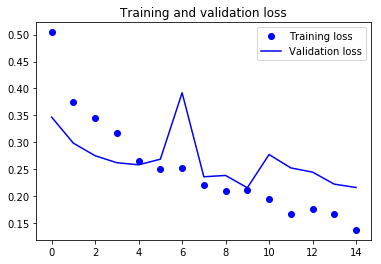

In [6]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### We can see that around 10th epoch the models starts to overfit

# Now let's try with data augumentation

In [14]:
augumented_train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

validation_generator = test_datagen.flow_from_directory(
        directory = '/content/gdrive/My Drive/FireVideo/binary_dataset/validation',
        target_size=(150, 150),
        batch_size=16,
        class_mode='binary')


aug_train_generator = augumented_train_datagen.flow_from_directory(
        # This is the target directory
        '/content/gdrive/My Drive/FireVideo/binary_dataset/train',
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=16,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 191 images belonging to 2 classes.
Found 1826 images belonging to 2 classes.


In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [16]:
history = model.fit_generator(
      aug_train_generator,
      steps_per_epoch=100,
      epochs=25,
      validation_data=validation_generator,
      validation_steps=50)

model.save('binary_model_augumented_50epochs.h5')

Epoch 1/25
100/100 [==============================] - 123s 1s/step - loss: 0.5691 - acc: 0.6920 - val_loss: 0.4521 - val_acc: 0.7469
Epoch 2/25
100/100 [==============================] - 113s 1s/step - loss: 0.4442 - acc: 0.7902 - val_loss: 0.3025 - val_acc: 0.8794
Epoch 3/25
100/100 [==============================] - 112s 1s/step - loss: 0.3697 - acc: 0.8322 - val_loss: 0.2779 - val_acc: 0.8631
Epoch 4/25
100/100 [==============================] - 111s 1s/step - loss: 0.3695 - acc: 0.8363 - val_loss: 0.3168 - val_acc: 0.8794
Epoch 5/25
100/100 [==============================] - 116s 1s/step - loss: 0.3590 - acc: 0.8385 - val_loss: 0.2608 - val_acc: 0.8957
Epoch 6/25
100/100 [==============================] - 114s 1s/step - loss: 0.3444 - acc: 0.8510 - val_loss: 0.2548 - val_acc: 0.8926
Epoch 7/25
100/100 [==============================] - 117s 1s/step - loss: 0.3312 - acc: 0.8486 - val_loss: 0.2381 - val_acc: 0.9008
Epoch 8/25
100/100 [==============================] - 115s 1s/step - 

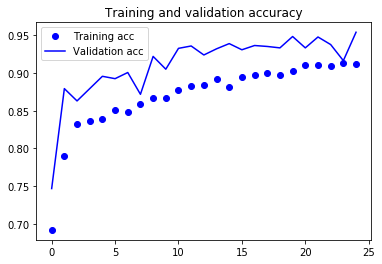

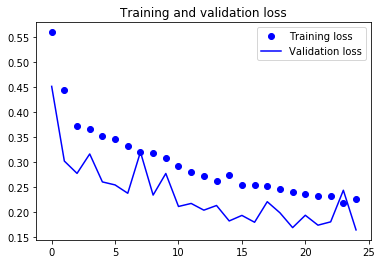

In [17]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

That's super odd... The validation accuracy is greater than training set accuracy.

In [0]:
model.save('/content/gdrive/My Drive/FireVideo/binary_classifier_from_scratch_25epochs.h5')